In [20]:
import numpy as np
import pandas as pd

from IPython.display import Image
import matplotlib.pyplot as plt

import impdar
from impdar.lib import load
from impdar.lib import plot
#from impdar.lib import picklib as imppick
from impdar.lib import RadarData

This Notebook shows how, after picking a layer in ice or snow radar data, you would go about verifying that you have picked a single line (and not a combination of multiple lines, meaning you would have to repick that layer). But first, what does it mean to *pick* a layer? Picking is the process of digitizing reflectors within the glacier or ice sheet (**expand on this**).

While a pick's power can vary along its length, just as a layer in ice or snow data can vary in depth depending on the surface and bed topography, power should not change drastically. It should be smooth during transitions if it changes at all.

Let's take a look at what a picked line looks like when you load it in ImpDAR. As an example, we will use a line collected in early 2020 from Hercules Dome, Antarctica.

In [21]:
#example matlab file name on disk
herc_mat_file = '../data/HDGridE_x53_migtk_picks.mat'

#exported picks csv file
picks_csv = "../data/HDGridE_x53_migtk_picks.csv"

#load the hercules dome data, now an ImpDAR RadarData object
dat = load.load('mat', herc_mat_file)[0]

#load picks as pandas dataframe
picks = pd.read_csv(picks_csv)

TypeError: 'NoneType' object is not subscriptable

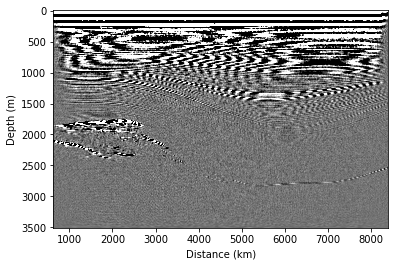

In [22]:
# make a basic plot of the radargram
fig, ax = plt.subplots()
im, _, _, _, _ = plot.plot_radargram(dat, fig=fig, ax=ax, xdat='dist', ydat='depth', return_plotinfo=True)

# calculate the return power
c = 10. * np.log10(dat.picks.power[0, :])
c -= np.nanmax(c)

# plot the return power on the layer, being careful of NaNs
mask = ~np.isnan(dat.picks.samp1[0, :])

cm = ax.scatter(dat.dist[mask.flatten()],
                dat.nmo_depth[dat.picks.samp1[0, :].astype(int)[mask]],
                c=c.flatten()[mask.flatten()],
                s=1)

In [109]:
picks

,# lat,lon,tnum,Layer_1_twtt,Layer_2_twtt
0,-86.440010,252.850116,1.0,NaN,24.550
1,-86.439994,252.849423,2.0,NaN,24.550
2,-86.439978,252.848730,3.0,NaN,NaN
3,-86.439962,252.848036,4.0,NaN,NaN
4,-86.439945,252.847343,5.0,NaN,NaN
5,-86.439929,252.846650,6.0,NaN,NaN
6,-86.439913,252.845956,7.0,13.430,NaN
7,-86.439897,252.845263,8.0,13.425,NaN
8,-86.439881,252.844570,9.0,13.425,NaN
9,-86.439865,252.843876,10.0,13.445,NaN


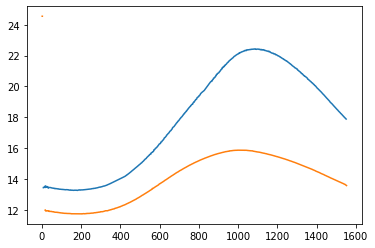

In [113]:
#these are actually upside down!
plt.plot(picks.tnum, picks.Layer_1_twtt)
plt.plot(picks.tnum, picks.Layer_2_twtt)

In [32]:
#plot.plot(herc_mat_file)

In [24]:
vars(dat)

{'chan': 2,
 'data': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.16225441, 0.16770338, 0.16595683, ..., 0.01628703, 0.03562984,
         0.05136612],
        [0.08894336, 0.11456585, 0.13973841, ..., 0.06803717, 0.06350657,
         0.05522835],
        [0.00824118, 0.01671541, 0.02862275, ..., 0.02588058, 0.01798788,
         0.01172686]]),
 'decday': array([737454.07234843, 737454.07236893, 737454.07238942, ...,
        737454.10497516, 737454.1049937 , 737454.10501218]),
 'dt': 5e-09,
 'lat': array([-86.44000996, -86.43999383, -86.4399777 , ..., -86.41424587,
        -86.41422667, -86.41420724]),
 'long': array([252.85011635, 252.84942301, 252.84872966, ..., 251.78453531,
        251.78386739, 251.78320123]),
 'pressure'

In [25]:
!imppick ../data/HDGridE_x53_migtk_picks.mat

/home/jakidxav/ImpDAR/impdar/gui/pickgui.py:156: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.
  plt.show(self.fig)


We can load the data file in ImpDAR, and access the picks and their corresponding indices with `data.picks` and `dat.picks.picknums` respectively.

In [26]:
vars(dat.picks)

{'samp1': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4892., 4892.,   nan, ..., 2711., 2709.,   nan]]),
 'samp2': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4925., 4925.,   nan, ..., 2731., 2728.,   nan]]),
 'samp3': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [4941., 4944.,   nan, ..., 2749., 2746.,   nan]]),
 'time': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'power': array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [22.82906175, 30.01928916,         nan, ..., 59.5785543 ,
         45.63542284,         nan]]),
 'picknums': [1, 2],
 'lasttrace': <impdar.lib.LastTrace.LastTrace at 0x7f34b9a6c780>,
 'lt': <impdar.lib.LeaderTrailer.LeaderTrailer at 0x7f34b9a6cbe0>,
 'pickparams': <impdar.lib.PickParameters.PickParameters at 0x7f34b81df898>,
 'radardata': <impdar.lib.RadarData.RadarData at 0x7f34b80469e8>,
 'lines': []}

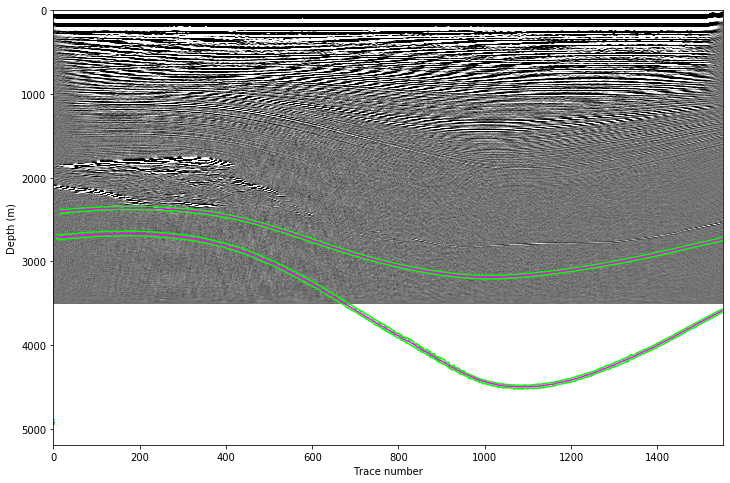

In [31]:
plot.plot_radargram(dat, ydat='depth')

plt.plot(dat.trace_num, dat.picks.samp1[0], color='lime')
plt.plot(dat.trace_num, dat.picks.samp1[1], color='lime')

plt.plot(dat.trace_num, dat.picks.samp2[0], color='magenta')
plt.plot(dat.trace_num, dat.picks.samp2[1], color='magenta')

plt.plot(dat.trace_num, dat.picks.samp3[0], color='lime')
plt.plot(dat.trace_num, dat.picks.samp3[1], color='lime')

plt.show()

Now we are ready to plot the power of our pick to verify it. Here is the current code for the `plot_power()` method in ImpDAR:

````python
def plot_power(dat, idx):
    #check to see if the picknum index exists
    try:
        idx = int(idx)
    except TypeError:
        raise TypeError('Please enter an integer pick number')

    #check to see if dat.picks or dat.picks.picknums arrays are empty
    if (dat.picks is None) or (dat.picks.picknums is None):
        raise ValueError('There are no picks on this radardata, cannot plot return power')

    if idx not in dat.picks.picknums:
        raise ValueError('Pick number {:d} not found in your file'.format(idx))
    
    #set up figure and axis
    fig, ax = plt.subplots(figsize=(8, 12))
    
    #extract latitutde and longitude coordinates
    lons = dat.x_coord
    lats = dat.y_coord

    #calculate power across the pick
    pick_power = np.hstack([dat.picks.power[dat.picks.picknums.index(idx)].flatten()])

    c = 10 * np.log10(pick_power)
    clims = np.percentile(c[~np.isnan(c)], (1, 99))

    #throw an error if vmin=vmax, but we still want a plot of constant power
    if (clims[0] - clims[1]) / clims[0] < 1.0e-8:
        clims[0] = 0.99 * clims[0]
        clims[1] = 1.01 * clims[1]

    img = ax.scatter(lons.flatten(), lats.flatten(), c=c.flatten(), vmin=clims[0], vmax=clims[1])
    
    #add colorbar, x and y labels
    h = fig.colorbar(img)
    h.set_label('dB')
    
    ax.set_ylabel('Northing')
    ax.set_xlabel('Easting')
    
    return fig, ax
````

We can call the `plot_power()` method from a Jupyter Notebook:

**Add side by side figure for each power plot of the associated pick on the radargram.**

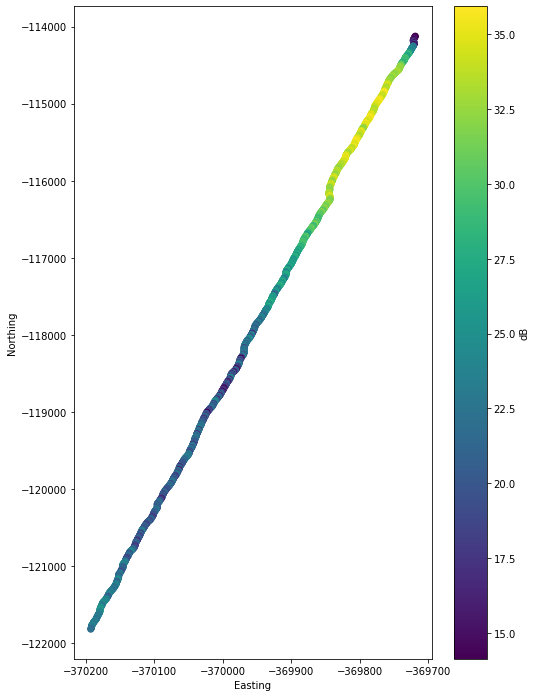

In [103]:
fig, ax = plot.plot_power(dat, 1)
plt.show()

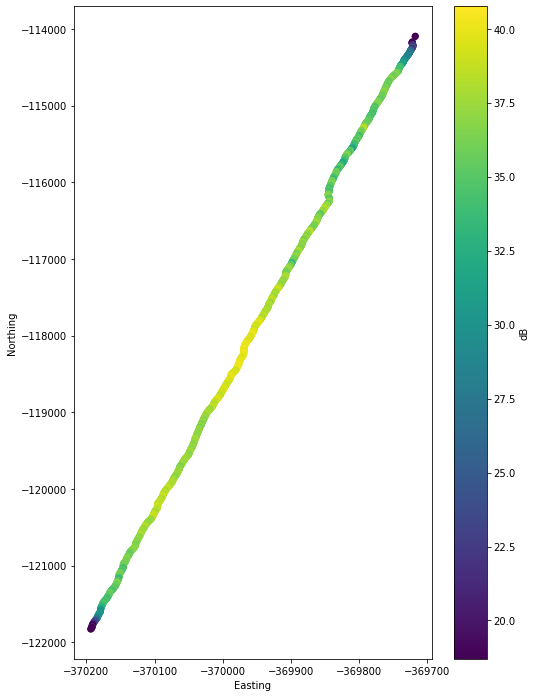

In [104]:
fig, ax = plot.plot_power(dat, 2)
plt.show()

If you wanted to run this method from the command line instead, you would use:

```python
impdar plot -power 1 HDGridE_x53_migtk_picks.mat

```

As you can see, our pick's power does not change drastically along its length. This gives us more confidence that we have correctly identified a single layer within the snow or ice data. As you can see, doing this for each and every pick in a radargram profile would be a time-consuming process. But checking important layers at different depths in a radargram's profile can help you quickly verify that you have isolated individual ice and snow layers.

To Do:
- get data for this tutorial so that people using it can play around with different attributes, or different ways of calling the method